# 3. Domain Characterization: Taxonomy

In this notebook we collect the taxonomy lineage for each protein obtained from the family sequences dataset from Uniprot. The idea of this part is to answer the biological question: *In which organism does this proteins appear?*

In [ ]:
from __future__ import annotations
from src.taxonomy import load_accessions, run_taxonomy, plot_taxonomy_hierarchical_pruned
from Bio import SeqIO

## 3.1. Reading the data

Reading the data in `.fasta` format

In [8]:
protein_ids = []

for record in SeqIO.parse("results/proteins_family/O43099_verified_family.fasta", "fasta"):
    protein_ids.append(record.id)

print(protein_ids)

['O43099_TIR', 'UR50:UniRef50_O43099', 'UR50:UniRef50_P56577', 'UR50:UniRef50_P56578', 'UR50:UniRef50_Q69TY4', 'UR50:UniRef50_Q949U7', 'UR50:UniRef50_P99029', 'UR50:UniRef50_Q9XEX2', 'UR50:UniRef50_P14293', 'UR50:UniRef50_P73728', 'UR50:UniRef50_A9PCL4', 'UR50:UniRef50_Q9BGI1', 'UR50:UniRef50_P30044', 'UR50:UniRef50_P38013', 'UR50:UniRef50_B3EWI1', 'UR50:UniRef50_Q9SDD6', 'UR50:UniRef50_Q9M7T0', 'UR50:UniRef50_P44758', 'UR50:UniRef50_O14313', 'UR50:UniRef50_Q7G959']


#### 3.1.2. Data format

Here we just format the protein data to be in the right shape.

Input format: `['O43099_TIR', 'UR50:UniRef50_O43099', 'UR50:UniRef50_P56577', 'UR50:UniRef50_P56578'..]`

Output: `['O43099', 'P56577', 'P56578', 'Q69TY4', 'Q949U7', 'P99029'..]`

In [ ]:
clean_ids = []

for item in protein_ids:
    accession = item.split("_")[-1]
    clean_ids.append(accession)

clean_ids=clean_ids[1:]
print(clean_ids)

['O43099', 'P56577', 'P56578', 'Q69TY4', 'Q949U7', 'P99029', 'Q9XEX2', 'P14293', 'P73728', 'A9PCL4', 'Q9BGI1', 'P30044', 'P38013', 'B3EWI1', 'Q9SDD6', 'Q9M7T0', 'P44758', 'O14313', 'Q7G959']
Number of proteins in the family: 19


In [ ]:
print(f"Number of proteins in the family: {len(clean_ids)}")

From the previous step, we got 19 proteins that belongs to the same family. Now what we want know is in which organism we can find these proteins.

## 3.2. Getting taxnomy

For getting the taxnomy, we use **UniProt** database to get the taxonomic lineage for each protein in the family domain. 

In [ ]:
# Output path
output_path = 'results/taxonomy'

# Load proteins
accs = load_accessions(clean_ids)
print("N accessions:", len(accs))
print("First 10:", accs[:10])

# Run taxonomy pipeline
node_counts, edges = run_taxonomy(accs, out_prefix=f"{output_path}/taxonomy", polite_sleep=0.0)

print("Done. Outputs:")
print("f{output_path}/taxonomy_lineage.tsv")
print("f{output_path}/taxonomy_node_counts.tsv")

N accessions: 19
First 10: ['A9PCL4', 'B3EWI1', 'O14313', 'O43099', 'P14293', 'P30044', 'P38013', 'P44758', 'P56577', 'P56578']
Done. Outputs:
f{output_path}/taxonomy_lineage.tsv
f{output_path}/taxonomy_node_counts.tsv


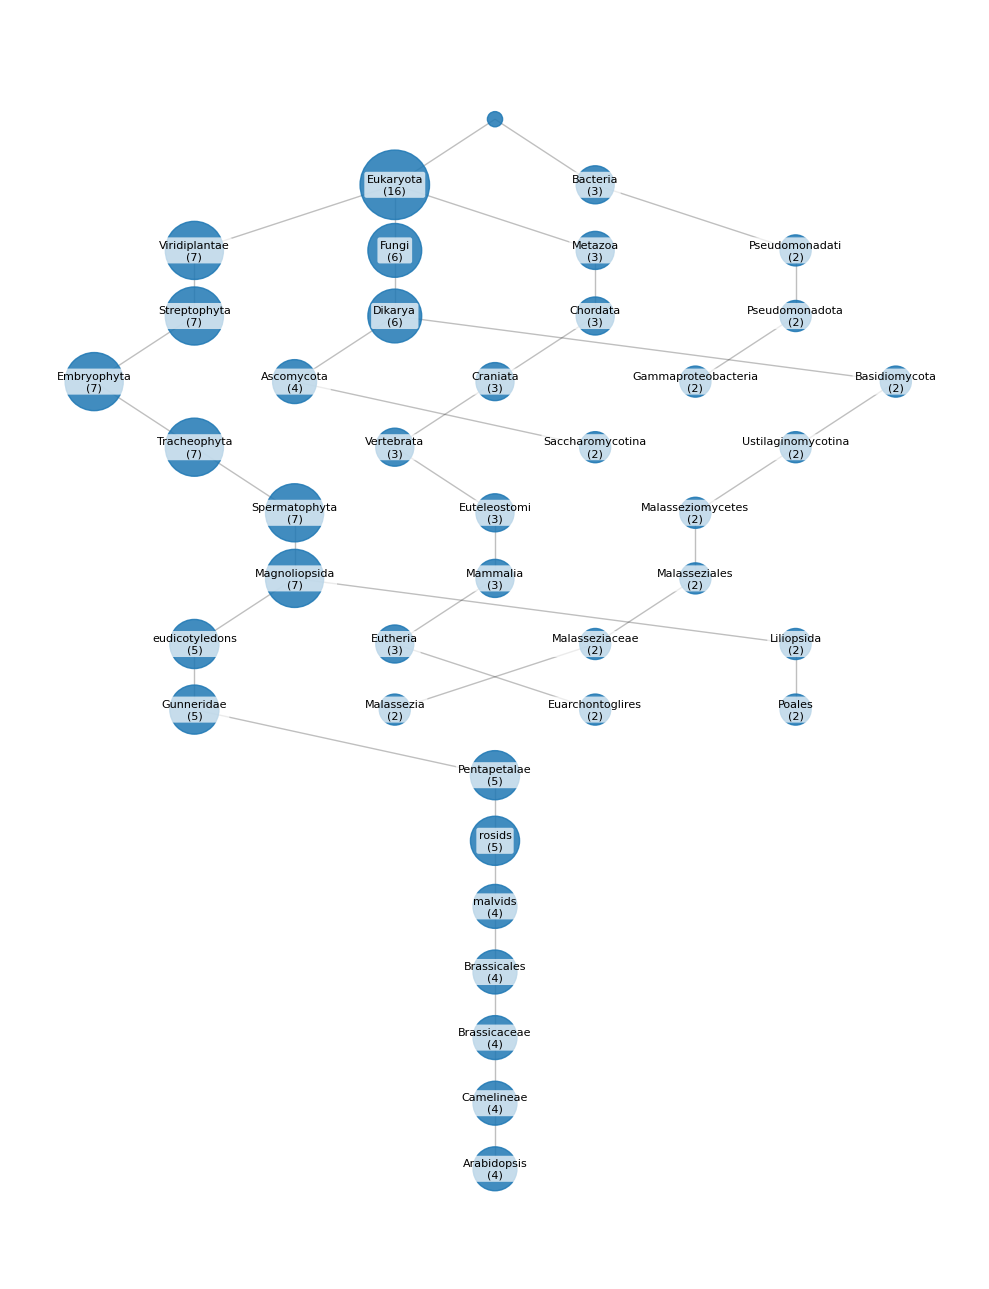

In [22]:
#plot_taxonomy_hierarchical(node_counts, edges, max_nodes=150, label_top_n=40)
plot_taxonomy_hierarchical_pruned(node_counts, edges, max_nodes=200, label_top_n=40, 
                                  out_path=f"{output_path}/taxonomy_tree_hier_pruned.png", fig_size=(10, 13),
    font_size=8)
